
[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\Yash\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


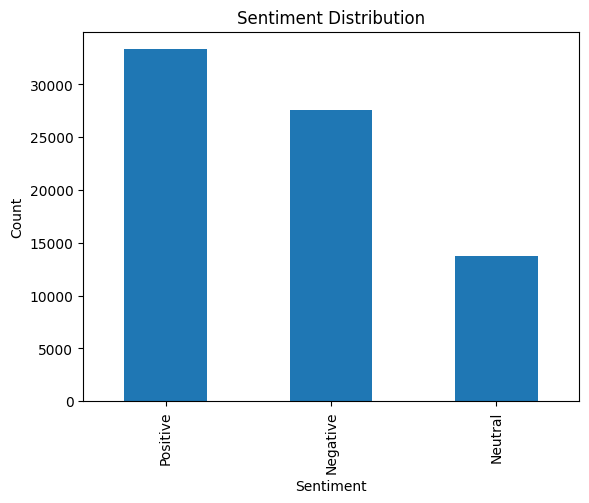

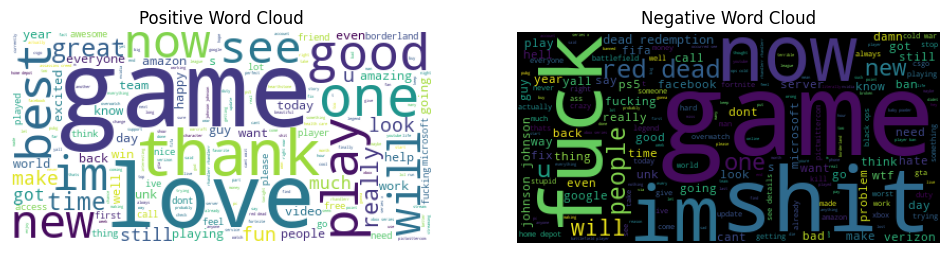

Analysis complete


In [2]:
import sys, re
!{sys.executable} -m pip install --quiet nltk wordcloud pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

nltk.download('vader_lexicon', quiet=True)

df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ["id", "topic", "label", "text"]

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

df["clean_text"] = df["text"].apply(clean_text)

sid = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["clean_text"].apply(lambda x: sid.polarity_scores(x)["compound"])
df["sentiment"] = df["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

positive_text = " ".join(df[df["sentiment"]=="Positive"]["clean_text"])
negative_text = " ".join(df[df["sentiment"]=="Negative"]["clean_text"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white").generate(positive_text))
plt.axis("off")
plt.title("Positive Word Cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="black").generate(negative_text))
plt.axis("off")
plt.title("Negative Word Cloud")
plt.show()

df.to_csv("sentiment_results.csv", index=False)
print("Analysis complete")
